## Importing Libraries

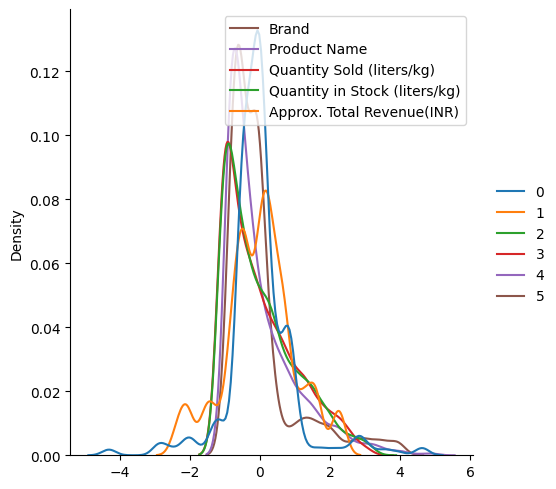

In [303]:
sns.displot(x_train_standard, kind="kde")
plt.legend(labels=["Brand","Product Name","Quantity Sold (liters/kg)", "Quantity in Stock (liters/kg)","Approx. Total Revenue(INR)"])
plt.show()

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from pandas.plotting import scatter_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, TargetEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.compose import ColumnTransformer

## Importing the dataset

In [305]:
dataset = pd.read_csv("./dataset/dairy_dataset.csv")
dataset.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


# EDA + Descriptive Statistics

In [306]:
dataset.dtypes

Location                                object
Total Land Area (acres)                float64
Number of Cows                           int64
Farm Size                               object
Date                                    object
Product ID                               int64
Product Name                            object
Brand                                   object
Quantity (liters/kg)                   float64
Price per Unit                         float64
Total Value                            float64
Shelf Life (days)                        int64
Storage Condition                       object
Production Date                         object
Expiration Date                         object
Quantity Sold (liters/kg)                int64
Price per Unit (sold)                  float64
Approx. Total Revenue(INR)             float64
Customer Location                       object
Sales Channel                           object
Quantity in Stock (liters/kg)            int64
Minimum Stock

In [307]:
dataset.isnull().sum()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

There's no null data in the dataset.

### Categorical attributes

In [308]:
dataset.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


In [309]:
cat_f = dataset.select_dtypes("object")
cat_f.columns

Index(['Location', 'Farm Size', 'Date', 'Product Name', 'Brand',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Customer Location', 'Sales Channel'],
      dtype='object')

In [310]:
cat_f.describe()

,Location,Farm Size,Date,Product Name,Brand,Storage Condition,Production Date,Expiration Date,Customer Location,Sales Channel
count,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325
unique,15,3,1278,10,11,5,1405,1441,15,3
top,Delhi,Large,2021-01-28,Curd,Amul,Refrigerated,2022-09-06,2022-02-01,Delhi,Retail
freq,525,1462,11,479,1053,2459,9,9,499,1478


In [311]:
cat_f.count()

Location             4325
Farm Size            4325
Date                 4325
Product Name         4325
Brand                4325
Storage Condition    4325
Production Date      4325
Expiration Date      4325
Customer Location    4325
Sales Channel        4325
dtype: int64

In [312]:
for col in cat_f:
    print(col, len(cat_f[col].unique()))

Location 15
Farm Size 3
Date 1278
Product Name 10
Brand 11
Storage Condition 5
Production Date 1405
Expiration Date 1441
Customer Location 15
Sales Channel 3


Date, Production Date and Expiration Date has a lot of unique values so we have to drop them.

In [313]:
dataset=dataset.drop(['Date', 'Production Date', 'Expiration Date'], axis=1)

### Numerical attributes

In [314]:
num_f = dataset.select_dtypes("number")
num_f.columns

Index(['Total Land Area (acres)', 'Number of Cows', 'Product ID',
       'Quantity (liters/kg)', 'Price per Unit', 'Total Value',
       'Shelf Life (days)', 'Quantity Sold (liters/kg)',
       'Price per Unit (sold)', 'Approx. Total Revenue(INR)',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [315]:
fig = make_subplots(rows=4, cols=4)
for i, column in enumerate(num_f.columns):
    row = i // 4 + 1
    col = i % 4 + 1
    trace = go.Histogram(x=num_f[column], name=column)
    fig.add_trace(trace, row=row, col=col)
fig.show()

### Outliers

In [316]:
fig = make_subplots(rows=7, cols=2, horizontal_spacing=0.4)
for i, column in enumerate(num_f.columns):
    row = i // 2 + 1
    col = i % 2 + 1
    trace = go.Box(x=num_f[column], name=column)
    fig.add_trace(trace, row=row, col=col)
fig.show()

From the result, we can see that Quantity Sold and Shelf Life contains a lot of outliers. But for the purpose of demonstrating Robust Scaling, we're not removing the outliers.

In [317]:
def calc_iqr(df, attr):
    q3 = df[attr].quantile(0.75)
    q1 = df[attr].quantile(0.25)
    return q1, q3, q3 - q1

for col in num_f:
    q1, q3, iqr = calc_iqr(num_f, col)
    serie = num_f[col]
    outliers = serie[(serie < q1 - 1.5 * iqr) | (serie > q3 + 1.5 * iqr)]
    print(f"Outliers in column {col}: {outliers.size/dataset.shape[0] * 100} %")


Outliers in column Total Land Area (acres): 0.0 %
Outliers in column Number of Cows: 0.0 %
Outliers in column Product ID: 0.0 %
Outliers in column Quantity (liters/kg): 0.0 %
Outliers in column Price per Unit: 0.0 %
Outliers in column Total Value: 0.8554913294797687 %
Outliers in column Shelf Life (days): 13.364161849710982 %
Outliers in column Quantity Sold (liters/kg): 1.6416184971098264 %
Outliers in column Price per Unit (sold): 0.0 %
Outliers in column Approx. Total Revenue(INR): 5.202312138728324 %
Outliers in column Quantity in Stock (liters/kg): 0.9479768786127168 %
Outliers in column Minimum Stock Threshold (liters/kg): 0.0 %
Outliers in column Reorder Quantity (liters/kg): 0.0 %


There's not a lot of outliers.

## Sunburst Chart

In [318]:
product_by_brand = cat_f.groupby(["Product Name", "Brand"]).size().reset_index(name="Count")
fig2 = px.sunburst(product_by_brand,
                    path=["Brand", "Product Name"],
                    values="Count",
                    title="Sunburst charts of products by brand"
                    )
fig2.show()

From here, we can see the advantages of a sunburst chart. We can tell which brand make which product in one chart quite intuitively. As opposed to the alternative.

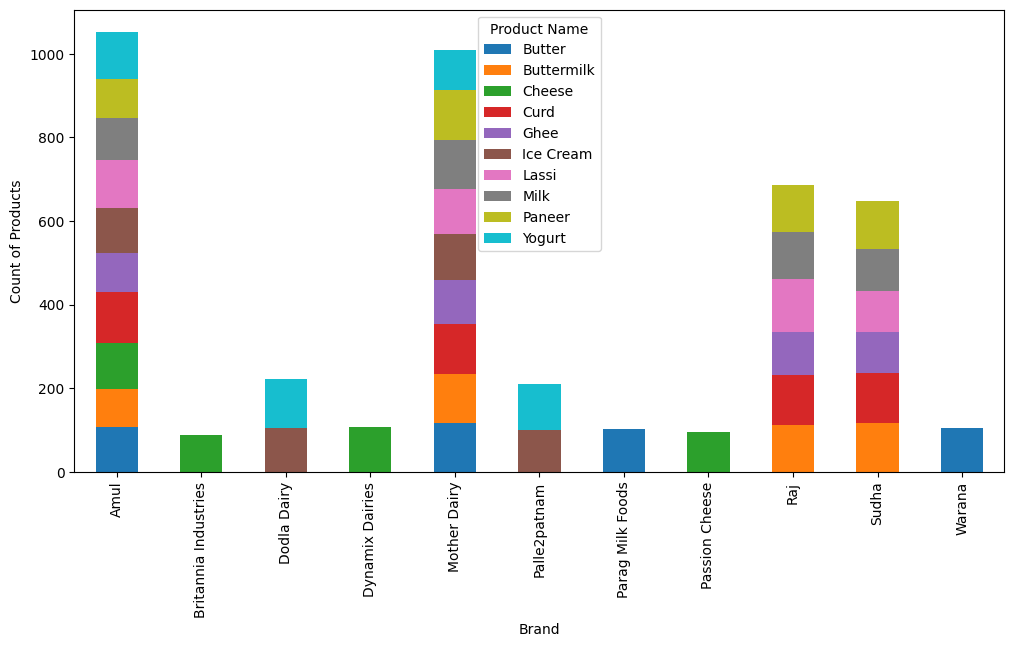

In [319]:
product_by_brand.pivot(index="Brand",
                       columns="Product Name",
                       values="Count").plot(kind="bar",
                                            stacked=True,
                                            figsize=(12, 6))
plt.xlabel("Brand")
plt.ylabel("Count of Products")
plt.legend(title="Product Name")

In [320]:
product_by_size_loc = cat_f.groupby(["Location", "Farm Size", "Product Name"]).size().reset_index(name="Count")
fig1 = px.sunburst(product_by_size_loc,
                    path=["Location", "Farm Size", "Product Name"],
                    values="Count",
                    title="Sunburst charts of products by location and farm size"
                    )
fig1.show()

For this chart, it'd be impossible to plot in all of these attributes in one traditional bar/pie chart. Therefore, using sunburst chart is the most optimal in this scenario.

## Correlation matrix

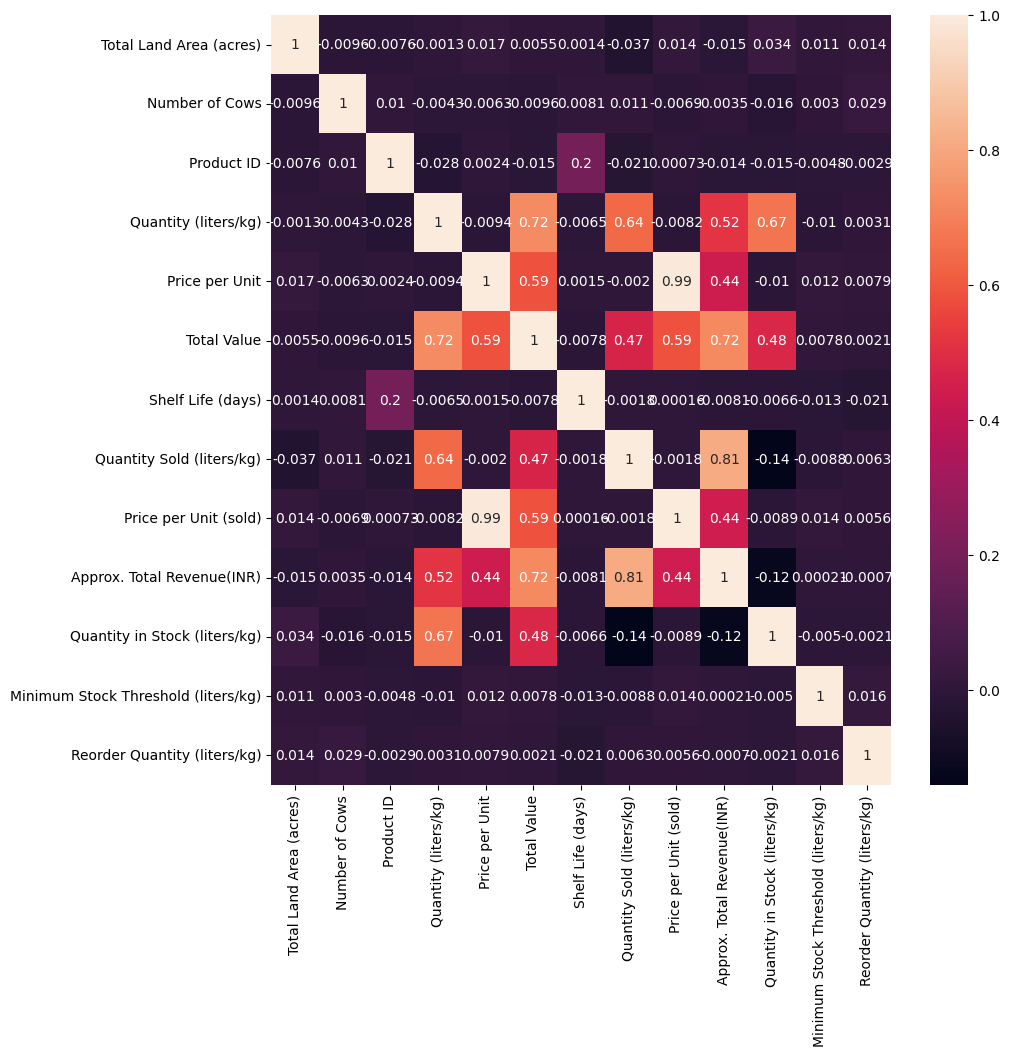

In [321]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(num_f.corr(), annot=True)
plt.show()

In [322]:
fig = make_subplots(rows=7, cols=2, horizontal_spacing=0.4)
for i, column in enumerate(num_f.columns):
    row = i // 2 + 1
    col = i % 2 + 1
    trace = go.Scatter(x=num_f[column], y=num_f["Price per Unit"], name=column, mode="markers")
    fig.add_trace(trace, row=row, col=col)
fig.update_layout(width=1000, height=1200)
fig.show()

From the scatter plot and the correlation matrix, we will predict price per unit from brand, product name, quantity sold, quantity in stock, Approx. total revenue, and Shelf Life because these are the numerical attributes with outliers. The scatter plot show us that there are not a lot of features that have a linear relationship with our target variable, so we will use KNN.

# Data Pre-processing

We'll showcase RobustScaler vs StandardScaler

## Convert Categorical data to numerical

We'll encode using target encoding to avoid the "curse of dimensionality".

In [335]:
te = TargetEncoder()
df = dataset.copy()
y = df["Price per Unit"]
ct = ColumnTransformer(transformers=[("", te, ["Brand",
                                                "Product Name"])],
                        verbose_feature_names_out=False,
                        remainder="passthrough")
x = df[["Brand",
        "Product Name",
        "Quantity Sold (liters/kg)",
        "Quantity in Stock (liters/kg)",
        "Approx. Total Revenue(INR)"]]

t_data = ct.fit_transform(x, y)
t_data_columns = ct.get_feature_names_out()
t_df = pd.DataFrame(t_data, columns=t_data_columns)
t_df.head()

,Brand,Product Name,Quantity Sold (liters/kg),Quantity in Stock (liters/kg),Approx. Total Revenue(INR)
0,53.242875,51.844122,7.0,215.0,575.68
1,54.747387,54.134100,558.0,129.0,21895.92
2,53.670375,54.684600,256.0,247.0,8655.36
3,52.034100,53.114316,601.0,222.0,17380.92
4,54.220436,55.902000,145.0,2.0,12045.15


In [336]:
y = df["Total Value"]
x = t_df[["Brand", "Product Name", "Quantity Sold (liters/kg)", "Quantity in Stock (liters/kg)", "Approx. Total Revenue(INR)"]]

## Split train-test

We'll split train : test = 0.8 : 0.2

In [337]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1992)

In [338]:
print(x_train, x_test, y_train, y_test)

          Brand  Product Name  Quantity Sold (liters/kg)  \
2696  55.309765     51.187820                      335.0   
165   54.426578     55.394933                       35.0   
1811  54.426578     55.049113                       14.0   
3156  55.624830     54.603828                       15.0   
1447  55.228999     54.918676                      195.0   
...         ...           ...                        ...   
3341  55.228999     53.723484                       20.0   
1835  54.534948     54.087486                       47.0   
2216  53.121077     52.348090                       96.0   
4093  54.792837     58.301920                      185.0   
2313  55.531635     56.100905                       21.0   

      Quantity in Stock (liters/kg)  Approx. Total Revenue(INR)  
2696                          654.0                    22699.60  
165                            41.0                     3087.35  
1811                           20.0                      562.10  
3156           

## Feature Scaling ***

Now let's compare the distribution of the scaled values when using z-score normalization vs Robust scaling

In [339]:
scaler = StandardScaler().fit(x_train)
x_train_standard = scaler.transform(x_train)
x_test_standard = scaler.transform(x_test)

In [340]:
print(x_train_standard, x_test_standard)

[[ 0.38344718 -2.17453473  0.41270426  1.76759446  0.62800852]
 [-0.25761194  0.36118223 -0.98052848 -0.96156684 -0.71809377]
 [-0.25761194  0.15274902 -1.07805477 -1.05506176 -0.8914163 ]
 ...
 [-1.20520619 -1.47521502 -0.69723782 -0.81464625 -0.59560291]
 [ 0.00823593  2.1132853  -0.28391211  1.76314232 -0.50272152]
 [ 0.54449047  0.78668637 -1.04554601  0.80593241 -0.88057254]] [[ 0.29496277 -0.02469526 -0.06099487 -0.8324548  -0.30278478]
 [-0.02475326 -0.12993656 -1.10127532 -1.07287032 -0.92514736]
 [-0.56450545  1.22802122 -1.13378408 -1.1396524  -0.92455229]
 ...
 [ 0.30491622  0.15274902  0.29660153  0.20044148  0.84451326]
 [ 0.44320656 -0.03611597 -1.04554601  1.08196503 -0.82265903]
 [-0.48193569 -0.03611597 -0.91086684  1.38916264 -0.61911067]]


In [341]:
rb = RobustScaler()
x_train_robust = rb.fit_transform(x_train)
x_test_robust = rb.transform(x_test)

In [343]:
print(x_train_robust, x_test_robust)

[[ 0.53080529 -1.86210992  0.49584027  1.40797546  0.86933413]
 [-0.20997563  0.33423254 -0.50249584 -0.47239264 -0.31883755]
 [-0.20997563  0.15369555 -0.57237937 -0.53680982 -0.47182513]
 ...
 [-1.30497564 -1.25638554 -0.29950083 -0.37116564 -0.21071785]
 [ 0.09722696  1.85183818 -0.00332779  1.40490798 -0.12873372]
 [ 0.71690012  0.70278819 -0.54908486  0.74539877 -0.4622536 ]] [[ 0.42855643  0.          0.15640599 -0.38343558  0.04774557]
 [ 0.05910605 -0.09115604 -0.5890183  -0.54907975 -0.50159871]
 [-0.56460885  1.0850558  -0.61231281 -0.59509202 -0.50107346]
 ...
 [ 0.44005821  0.15369555  0.41264559  0.32822086  1.06043759]
 [ 0.59986071 -0.00989219 -0.54908486  0.93558282 -0.41113476]
 [-0.46919471 -0.00989219 -0.45257903  1.14723926 -0.23146758]]


Here's the difference of distribution between standard scaling and robust scaling.

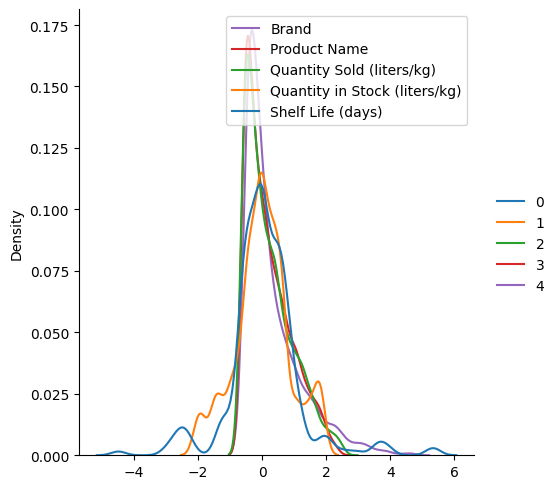

In [344]:
sns.displot(x_train_robust, kind="kde")
plt.legend(labels=["Brand", "Product Name", "Quantity Sold (liters/kg)", "Quantity in Stock (liters/kg)", "Shelf Life (days)"])
plt.show()

We can see that robust scaling has more "Normal" distribution but has a larger range compared to z-score standardization.

# Build Model

This is to demonstrate the resulting  of model made wisth data scaled by StandardScaler vs Robust Scalert scaler. The model will use KNeighboursRegressor since we're gonna predict numerical attribute with both categorical and numercial attributes as dependent vars.

Standard Scaler

In [345]:
chosen_k = 9999
lowest_rmse = 1e100
for k in range(1,int(4326**0.5)+1):
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(x_train_standard, y_train)
  y_pred = model.predict(x_test_standard)
  mse = mean_squared_error(y_test, y_pred)
  if mse ** 0.5 < lowest_rmse:
    chosen_k = k
    lowest_rmse = mse ** 0.5
  if k == 65:
    print(k, mse ** 0.5)
print(chosen_k, lowest_rmse)

65 8679.663906059728
4 7050.526456205677


Robust scaler

In [346]:
chosen_k = 9999
lowest_rmse = 1e100
for k in range(1,int(4326**0.5)+1):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_robust, y_train)
    y_pred = model.predict(x_test_robust)
    mse = mean_squared_error(y_test, y_pred)
    if mse ** 0.5 < lowest_rmse:
      chosen_k = k
      lowest_rmse = mse ** 0.5
    if k == 65:
      print(k, mse ** 0.5)
print(chosen_k, lowest_rmse)

65 8921.050751805613
5 7127.0207994610355


From here, we can see that robust scaler have lower rmse than standard scaler when using the best k. The reason we only use k from 1 to sqrt of dataset rows is ....